# Python Tutorial on Topological Data Analysis (TDA) 

## Elizabeth Munch
 Dept of Computational Mathematics, Science and Engineering
 Dept of Mathematics
 Michigan State University

# Welcome

This notebook is meant to be a first step introduction to some available tools for computation of TDA signatures using python.  This repository includes the jupyter notebooks for the 2021 Workshop ["Mathematical and Computational Methods for Complex Social Systems"](https://www.google.com/url?q=https://meetings.ams.org/math/sc2021/meetingapp.cgi) to be held at the virtual JMM 2021, led by [Elizabeth Munch](http://elizabethmunch.com/). This introduction is tailored for a network science audience, so the focus is on an relevant tools when given a network input.

These slides are written to be presented as [RISE slides](https://rise.readthedocs.io/en/stable/index.html), however the notebook should be self contained without needing this installed. 













# Goals

- Give a brief overview of available packages
- Provide pipelines for computing persistent homology and (?) mapper graphs for input data such as a discrete metric space and a weighted graph.  


# Options to follow along



- Download from the github repo: [github.com/lizliz/TDA-Python-Workshop-JMM21](https://github.com/lizliz/TDA-Python-Workshop-JMM21)
- Run directly from binder: [tinyurl.com/jmm-tda](https://tinyurl.com/jmm-tda)



# An incomplete list of available software




New packages are being developed incredibly quickly.  I'm so happy to see the field taking off so fast.  That being said, I am choosing to use some of the packages I am most familiar with, which does not mean they will be the best option for your task. An incomplete and almost immeidately outdated list of available options is below. 

The first list are the most generic which will likely get you through most tasks. In this tutorial, we will use the first two




- [SciKitTDA](https://scikit-tda.org/) by Nataniel Saul and Chris Tralie
- [Teaspoon](http://elizabethmunch.com/code/teaspoon/index.html) By Liz Munch and Firas Khasawneh
- [Ripser](https://github.com/Ripser/ripser) by Ulrich Bauer
- [GUDHI](http://gudhi.gforge.inria.fr/) developed at INRIA
- [Giotto-tda](https://giotto-ai.github.io/) developted at EPFL
- [Cubicle](https://bitbucket.org/hubwag/cubicle/src/master/) by Hubert Wagner
- [HomcCube](https://i-obayashi.info/software.html) By Ippei Obayashi.
- [DIPHA](https://github.com/DIPHA/dipha) by Ulrich Bauer and Michael Kerber
- [diamorse](https://github.com/AppliedMathematicsANU/diamorse) developed at The Australian National University.
- [Perseus](http://people.maths.ox.ac.uk/nanda/perseus/) by Vidit Nanda

In [2]:
# Basic imports 

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons
import networkx as nx

# teaspoon imports...... Install with -> pip install teaspoon
import teaspoon.MakeData.PointCloud as makePtCloud
import teaspoon.TDA.Draw as Draw


# scikit-tda imports..... Install all with -> pip install scikit-tda
import ripser

# Computing persistence on a finite metric space



This covers point clouds in R^n inheriting Euclidean metric, as well as any other proximity or distance measure. 

## Annulus example

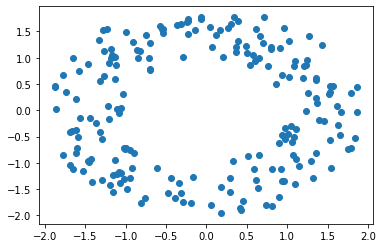

In [9]:
r = 1
R = 2

P = makePtCloud.Annulus(N=200, r=r, R=R, seed=None)
plt.scatter(P[:,0],P[:,1])

In [13]:
# Some quick code to draw stuff without showing all the matplotlib junk everytime. 

def drawTDAtutorial(P,diagrams, R = 2):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (20,5))

    # Draw point cloud 
    plt.sca(axes[0])
    plt.title('Point Cloud')
    plt.scatter(P[:,0],P[:,1])

    # Draw diagrams
    plt.sca(axes[1])
    plt.title('0-dim Diagram')
    Draw.drawDgm(diagrams[0])

    plt.sca(axes[2])
    plt.title('1-dim Diagram')
    Draw.drawDgm(diagrams[1])
    plt.axis([0,R,0,R])

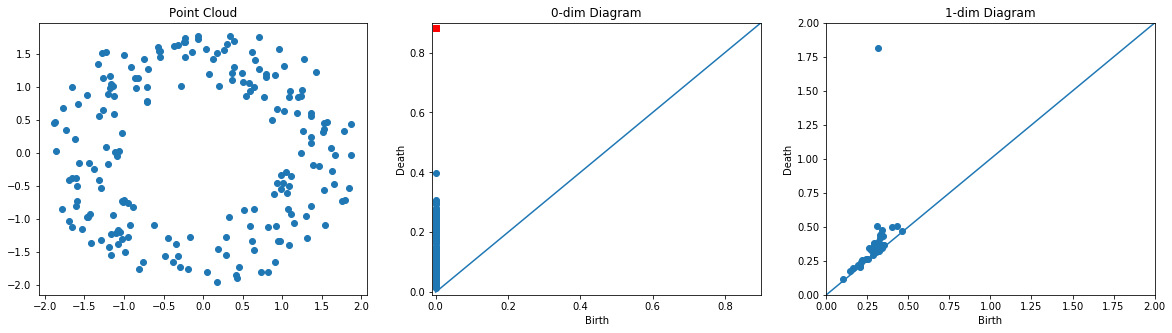

In [14]:
diagrams = ripser.ripser(P)['dgms']

# Draw stuff
drawTDAtutorial(P,diagrams)  # Script included in notebook for drawing

In [8]:
# Some discussion of how diagrams are stored 

len(diagrams)

2

### Cube example

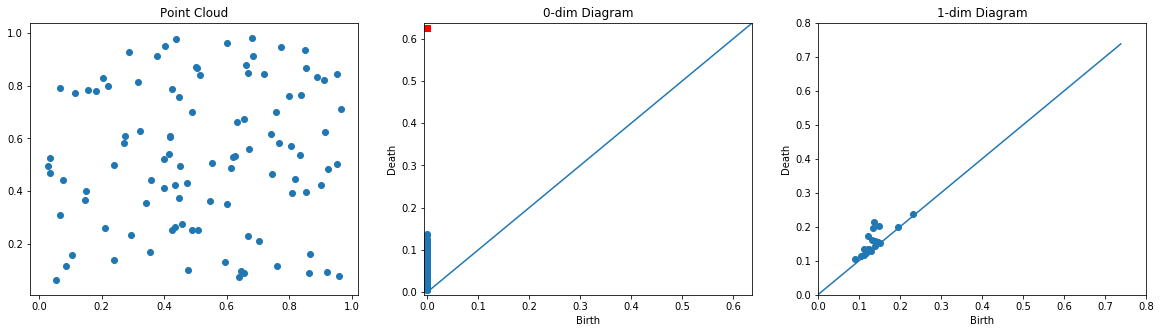

In [17]:
P = makePtCloud.Cube()
diagrams = ripser.ripser(P)['dgms']

# Draw stuff
drawTDAtutorial(P,diagrams,R=0.8) # Script for drawing everything, code included in notebook


### Double Annulus example

In [44]:
# Make a quick double annulus

def DoubleAnnulus(r1 = 1, R1 = 2, r2 = .8, R2 = 1.3, xshift = 3):
    P = makePtCloud.Annulus(r = r1, R = R1)
    Q = makePtCloud.Annulus(r = r2, R = R2)
    Q[:,0] = Q[:,0] + xshift
    P = np.concatenate((P, Q) )
    return(P)

# P = DoubleAnnulus()
# plt.scatter(P[:,0], P[:,1])

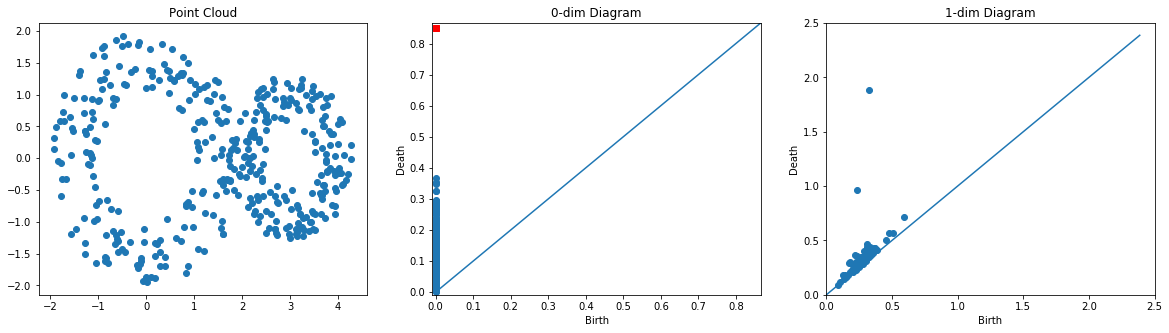

In [45]:
P = DoubleAnnulus(r1 = 1, R1 = 2, r2 = .5, R2 = 1.3, xshift = 3) # Code included in notebook
diagrams = ripser.ripser(P)['dgms']

# Draw stuff
drawTDAtutorial(P,diagrams,R=2.5) # Script for drawing everything, code included in notebook


## Ripser accepts a pairwise distance matrix 



In [47]:
print('TODO')

TODO


# Computing persistence for a weighted graph as the 1-skeleton

V1 Just doing the clique complex 

Most useful/interesting when we have a decently dense graph

In [ ]:
n = 10
p = .4

# Generate random graph 
G = nx.erdos_renyi_graph(n, p, seed=None, directed=False)

m = len(G.edges)
print('There are', m,'edges.')

# Generate random edge weights in the interval [0,maxWeight]
maxWeight = 100
weights = np.random.randint(maxWeight, size = m)

for i, e in enumerate(G.edges()):
    G[e[0]][e[1]] ['weight'] = weights[i]



In [ ]:
#draw it!

pos = nx.spring_layout(G)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=70)

# edges
nx.draw_networkx_edges(G, pos,  width=2)
# nx.draw_networkx_edges(
#     G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
# )

# labels
# nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
edge_labels=nx.draw_networkx_edge_labels(G,pos,edge_labels=nx.get_edge_attributes(G, 'weight'))

In [ ]:
# %matplotlib notebook
# from ipywidgets import *


# x = np.linspace(0, 2 * np.pi)
# fig = plt.figure()
# ax = fig.add_subplot(1, 1, 1)
# line, = ax.plot(x, np.sin(x))

# def update(w = 1.0):
#     line.set_ydata(np.sin(w * x))
#     fig.canvas.draw_idle()

# interact(update);
# plt.show()

In [50]:
# V2 Vietoris Rips of the metric graph 

# Changing the simplicial complex definition 

In [51]:
print('TODO')

TODO


# Distances between persistence diagrams 

In [52]:
print('TODO')

TODO


# Featurization for ML interfaces 

In [53]:
print('TODO')

TODO


# Thank you!!!

- Liz Munch [muncheli@msu.edu](mailto:muncheli@msu.edu)
- Website [elizabethmunch.com](elizabethmunch.com)


- NSF Logo
- CMSE Logo
- MSU Logo

- Wincoptop info
